# Исследование объявлений о продаже квартир

Цель работы - провести общее исследование данных сервиса Яндекс.Недвижимость.

Данные представляют собой  архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Ход работы:

1. Открытие файла и изучение общей информации;

2. Предобработка данных;

3. Добавление новых столбцов;

4. Проведение исследования;

5. Формулировка общего вывода. 

## Откройте файл с данными и изучите общую информацию. 

Открываем файл, учитываем параметр "sep".

In [3]:
import pandas as pd

data = pd.read_csv('datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выводим необходимую для дальнейшего анализа информацию.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Можно видеть несоответствующие типы данных для некоторых столбцов - `first_day_exposition` и `is_apartment`. В дальнейшем тип данных в этих стобцах будет изменен.  

Строим гистрограммы для всех столбцов.

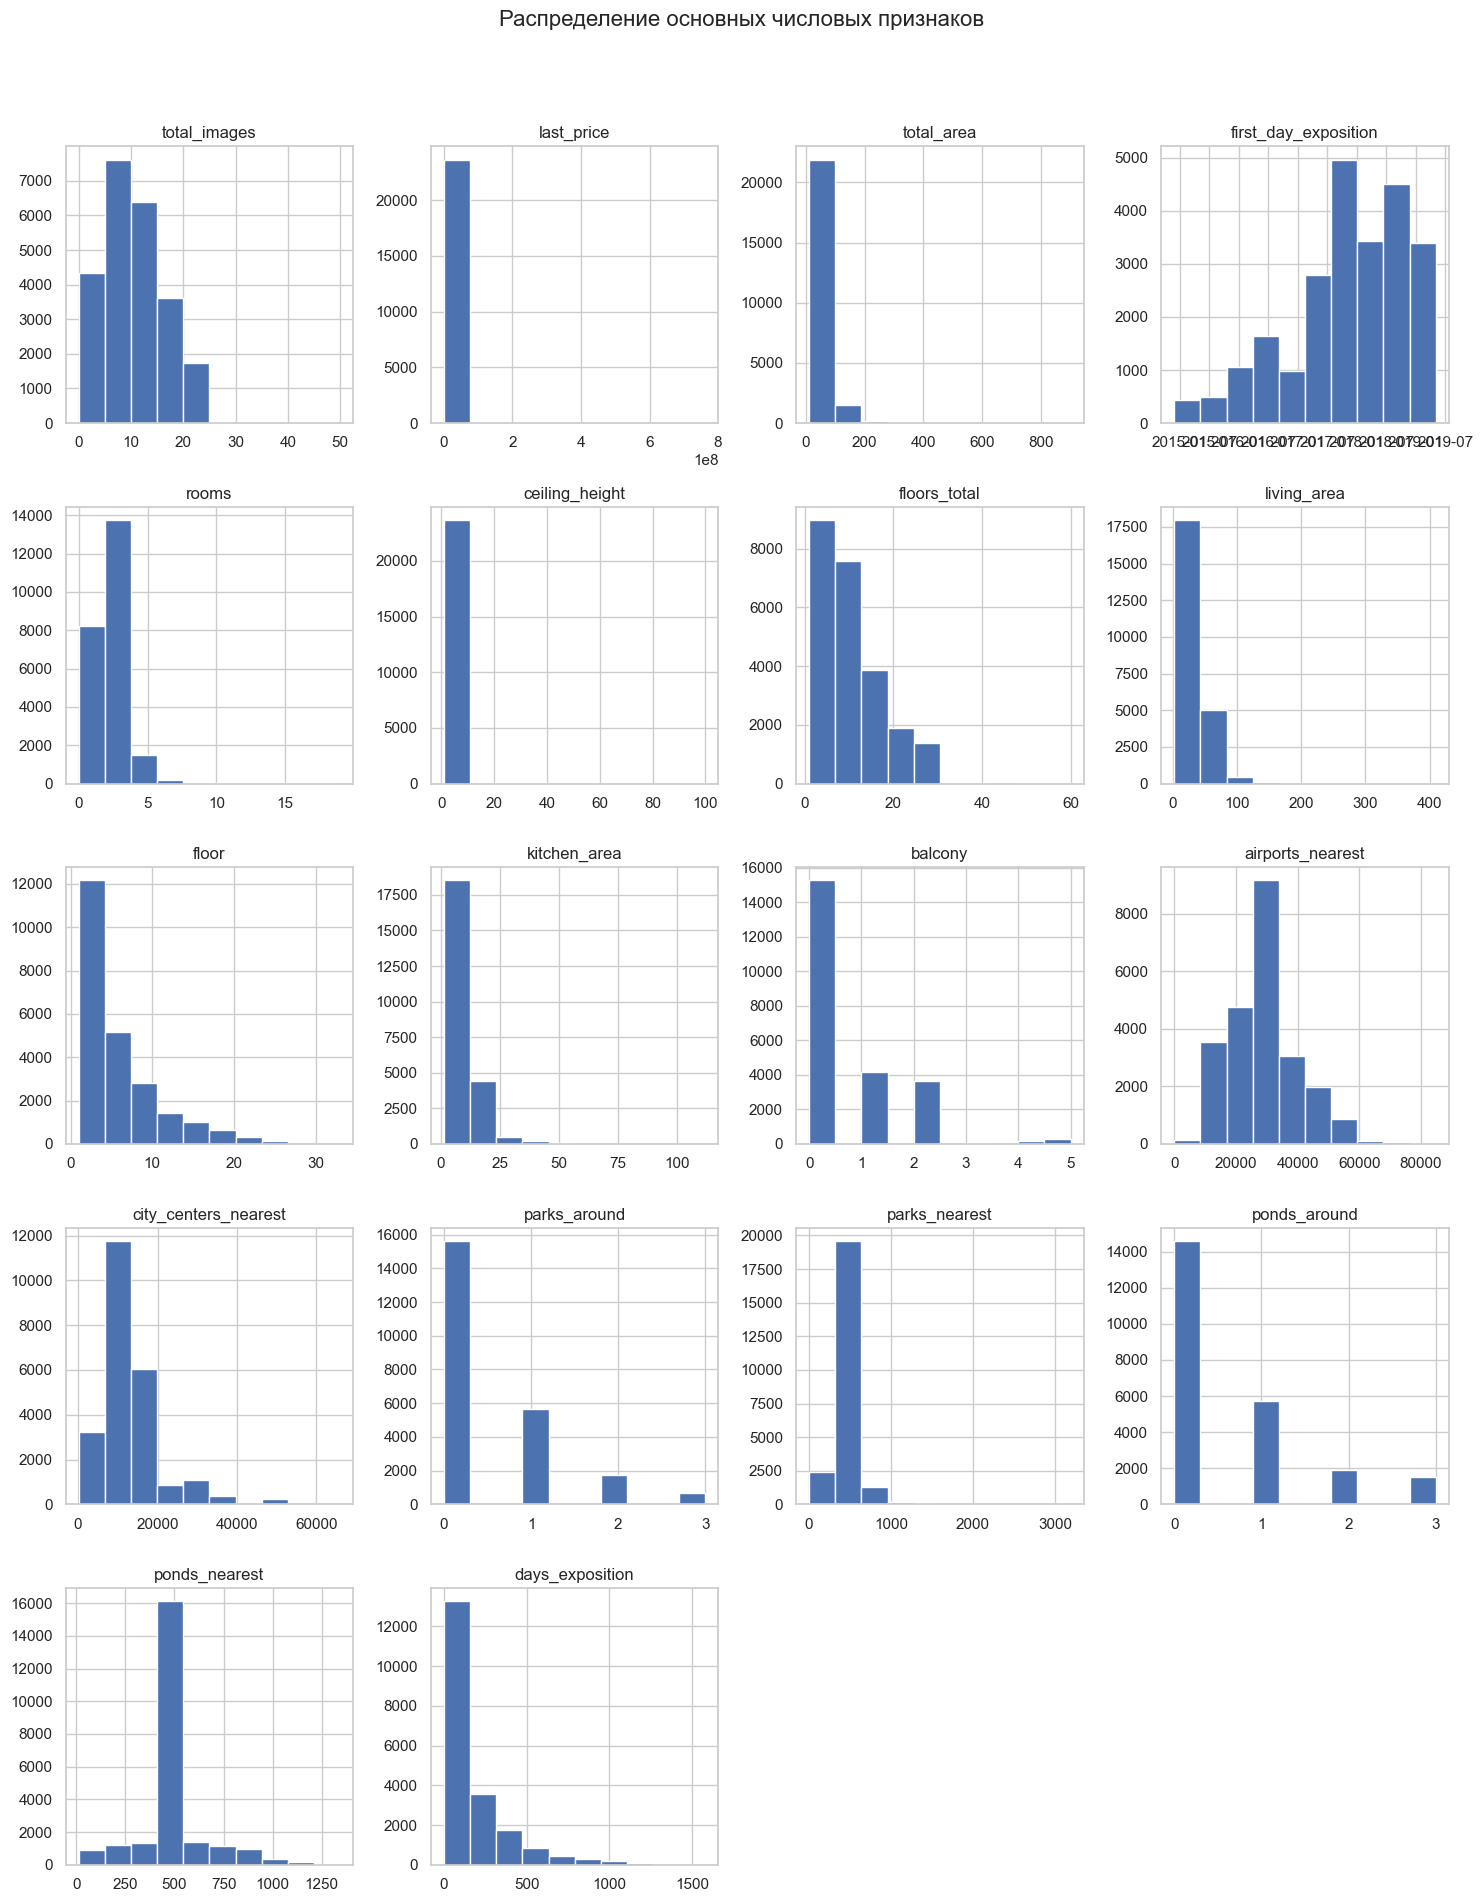

In [149]:
import matplotlib.pyplot as plt

data.hist(figsize=(15, 20))
plt.suptitle('Распределение основных числовых признаков', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Общая визуализация показывает сильную асимметрию и выбросы, поэтому далее рассмотрим ключевые признаки отдельно


## Предобработка данных

###  Заполнение пропусков

Изначально выведем пропуски для всех столбцов и их соотношение.

In [6]:
#data.isna().sum()

In [7]:
#data.isna().mean()

In [8]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


Можно сделать выводы о наличии довольно значительного количества пропусков в датафрейме. Заполним их.

Но в первую очередь необходимо дать некоторым столбцам соответствующее формату название.

In [9]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest', 'parks_around3000': 'parks_around', 'ponds_around3000': 'ponds_around'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Теперь займемся заполнением пропусков.

Пропуски в столбце, характеризующем высоту потолка, заполним медианным значением по датафрейму. 

In [10]:
print(data['ceiling_height'].head(10))
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].head(10)

0    2.70
1     NaN
2     NaN
3     NaN
4    3.03
5     NaN
6     NaN
7     NaN
8     NaN
9    2.50
Name: ceiling_height, dtype: float64


0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
5    2.65
6    2.65
7    2.65
8    2.65
9    2.50
Name: ceiling_height, dtype: float64

Пропуски в столбце жилой площади заполним средним соотношением жилой площади к общей, и умноженной на общую площадь.

In [11]:
living_ratio = (data['living_area'] / data['total_area']).mean()

data['living_area'] = data['living_area'].fillna(
    data['total_area'] * living_ratio
)
data['living_area'].head(10)

0    51.000000
1    18.600000
2    34.300000
3    89.797718
4    32.000000
5    14.400000
6    10.600000
7    40.437211
8    15.430000
9    43.600000
Name: living_area, dtype: float64

Аналогичным образом поступим и со столбцом кухонной площади.

In [12]:
kitchen_ratio = (data['kitchen_area'] / data['total_area']).mean()

data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_ratio)

data['kitchen_area'].head(10)

0    25.000000
1    11.000000
2     8.300000
3    29.789403
4    41.000000
5     9.100000
6    14.400000
7    18.900000
8     8.810000
9     6.500000
Name: kitchen_area, dtype: float64

Проверим количество пропусков

In [13]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.400000
living_area,0.000000
floor,0.000000
is_apartment,88.300000


Необходимо также избавиться от пропусков в столбцах, характеризующих расстояние до того или иного инфраструктурного объекта - `parks_nearest`, `ponds_nearest`, `airports_nearest` и `city_centers_nearest`. Заполним их медианным значением.

In [14]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['parks_nearest'].head(10)

0    482.0
1    455.0
2     90.0
3     84.0
4    112.0
5    455.0
6    455.0
7    455.0
8    455.0
9    455.0
Name: parks_nearest, dtype: float64

In [15]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['ponds_nearest'].head(10)

0    755.0
1    502.0
2    574.0
3    234.0
4     48.0
5    502.0
6    502.0
7    502.0
8    502.0
9    502.0
Name: ponds_nearest, dtype: float64

In [16]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['airports_nearest'].head(10)

0    18863.0
1    12817.0
2    21741.0
3    28098.0
4    31856.0
5    26726.0
6    52996.0
7    23982.0
8    26726.0
9    50898.0
Name: airports_nearest, dtype: float64

In [17]:
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())
data['city_centers_nearest'].head(10)

0    16028.0
1    18603.0
2    13933.0
3     6800.0
4     8098.0
5    13098.5
6    19143.0
7    11634.0
8    13098.5
9    15008.0
Name: city_centers_nearest, dtype: float64

Также заполним медианой признак `floors_total`, в котором присутствует небольшая доля пропусков.

In [18]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['floors_total'].head(10)

0    16.0
1    11.0
2     5.0
3    14.0
4    14.0
5    12.0
6    26.0
7    24.0
8    27.0
9     9.0
Name: floors_total, dtype: float64

Далее рассмотрим вопрос столбцов, характеризующих количество тех или иных инфраструктурных объектов поблизости - `parks_aroundёь` и `ponds_around`

In [19]:
data['parks_around'] = data['parks_around'].fillna(0)
data['parks_around'].head(10)

0    1.0
1    0.0
2    1.0
3    2.0
4    2.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: parks_around, dtype: float64

In [20]:
data['ponds_around'] = data['ponds_around'].fillna(0)
data['ponds_around'].head(10)

0    2.0
1    0.0
2    2.0
3    3.0
4    1.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: ponds_around, dtype: float64

Такой же подход применим к `balcony`. Пропуски в данных скорее всего говорят об отсутствии балкона, поэтому заполним пропуски в этом столбце нулем.

In [21]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].head(10)

0    0.0
1    2.0
2    0.0
3    0.0
4    0.0
5    0.0
6    1.0
7    2.0
8    0.0
9    2.0
Name: balcony, dtype: float64

Для пропусков в `locality_name` введем отдельную категорию "неизвестно".

In [22]:
data['locality_name'] = data['locality_name'].fillna('неизвестно')


Пропуски в столбце `days_exposition` не заполнялись, так как они,
вероятно, соответствуют объявлениям, которые на момент сбора данных
ещё не были сняты с публикации. Поэтому оставим их


Еще раз проверим наличие пропусков по таблице.

In [23]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,88.300000


Основные пропуски исправлены. К столбцу `is_apartment` будет применен другой подход.

### Изменение типов данных

Пропуски в столбце `is_apartment` были интерпретированы как отсутствие апартаментов,
так как данный тип жилья, как правило, явно указывается в объявлении. Тип данных в столбце заменим на булев, так в данном случае это либо апартаменты, либо нет.

In [24]:
data['is_apartment']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
23694    NaN
23695    NaN
23696    NaN
23697    NaN
23698    NaN
Name: is_apartment, Length: 23699, dtype: object

In [25]:
data['is_apartment'].value_counts()

is_apartment
False    2725
True       50
Name: count, dtype: int64

In [26]:
data['is_apartment'] = (
    data['is_apartment']
    .fillna(0)
    .astype(bool)
)


In [27]:
data['is_apartment'].value_counts()

is_apartment
False    23649
True        50
Name: count, dtype: int64

Также поменяем тип данных в `balcony`, `floors_total`, `parks_around`, `ponds_around` и `days_exposition` на целочисленный.

In [28]:
data['balcony'] = data['balcony'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['parks_around'] = data['parks_around'].astype('int')
data['ponds_around'] = data['ponds_around'].astype('int')
data['days_exposition'] = data['days_exposition'].round().astype('Int64')


Проверим.

In [29]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [30]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,0.000000
floors_total,0.000000
living_area,0.000000
floor,0.000000
is_apartment,0.000000


Теперь все данные приведены к нужному формату, а многочисленные пропуски в столбцах заполнены. Пропуски в `days_exposition` оставлены намеренно, так как соответствующие им объявления скорее всего не сняты с публикации.

### Устранение неявных дубликатов

Просмотрим уникальные значения в столбце населенных пунктов.

In [31]:
print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

Ближе к концу таблицы можно видеть неявные дубликаты - 'посёлок Пансионат Зелёный Бор' и 'поселок Пансионат Зелёный Бор'

Приведем все значения столбца к нижнему регистру и избавимся от дубликатов с буквой "ё" методом `replace`.

In [32]:
data['locality_name'] = data['locality_name'].str.lower()

# data = data.apply(lambda x: x.replace({'поселок':'посёлок', 'городской посёлок': 'посёлок', 'посёлок городского типа': \
#                                    'посёлок', 'коттеджный посёлок': 'посёлок', 'посёлок при железнодорожной станции': 'посёлок станции'}, regex=True))


data['locality_name'] = data['locality_name'].replace({
    'поселок': 'посёлок',
    'городской посёлок': 'посёлок',
    'посёлок городского типа': 'посёлок',
    'коттеджный посёлок': 'посёлок',
    'посёлок при железнодорожной станции': 'посёлок станции'
}, regex=True)

print(data['locality_name'].unique())

['санкт-петербург' 'посёлок шушары' 'посёлок янино-1' 'посёлок парголово'
 'посёлок мурино' 'ломоносов' 'сертолово' 'петергоф' 'пушкин'
 'деревня кудрово' 'коммунар' 'колпино'
 'посёлок городского типа красный бор' 'гатчина' 'деревня фёдоровское'
 'выборг' 'кронштадт' 'кировск' 'деревня новое девяткино'
 'посёлок металлострой' 'посёлок лебяжье' 'посёлок сиверский'
 'посёлок молодцово' 'посёлок городского типа кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'посёлок аннино' 'посёлок городского типа ефимовский'
 'посёлок плодовое' 'деревня заклинье' 'посёлок торковичи'
 'посёлок первомайское' 'красное село' 'посёлок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'посёлок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня оржицы' 'деревня кальтино'
 'кудрово' 'посёлок романовка' 'посёлок бу

Теперь избавимся от явных дубликатов.

In [33]:
print(data.duplicated().sum())
data = data.drop_duplicates().reset_index(drop=True)

0


Проблема решена, переходим к следующему этапу.

### Устранение аномальных значений

В заключительном этапе предобработки данных мы будем устранять выбивающиеся значения. Для нахождения анормальных значений мы будем использовать диаграмму размаха методами `boxplot()` (ящик с усами) и `describe()`, а оформлять срезы - методом `query()`.

Будем разбирать параметры таблицы. Изначально для каждого параметра будем строить ящик с усами и приводить описание, если выбросов и аномальных значений окажется слишком много - будем производить срез данных по этому параметру. 

Начнем с параметра общей площади.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

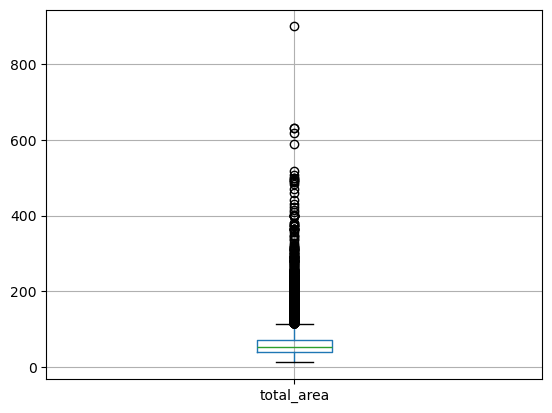

In [34]:
data.boxplot(column='total_area')
data['total_area'].describe()

Можно наблюдать значительное количество выбросов и сделать вывод о необходимости среза. Для фильтрованных данных создадим переменную `good_data`.

count    23462.000000
mean        58.119776
std         26.377730
min         12.000000
25%         40.000000
50%         51.800000
75%         68.872500
max        197.200000
Name: total_area, dtype: float64

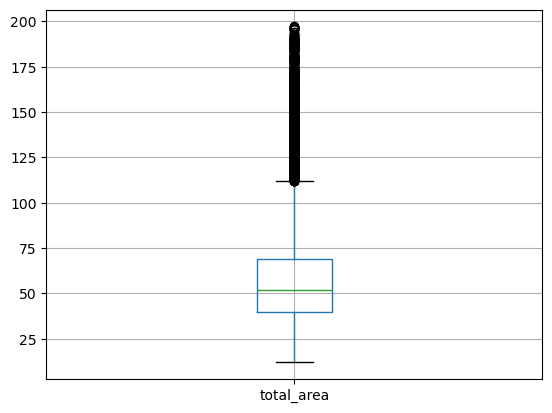

In [35]:
q99_total_area = data['total_area'].quantile(0.99)

good_data = data.query('total_area <= @q99_total_area')

good_data.boxplot(column='total_area')
good_data['total_area'].describe()


Теперь ближе к квантильному распределению.

Проводим те же операции для жилой площади.

count    23699.000000
mean        34.562480
std         22.326965
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

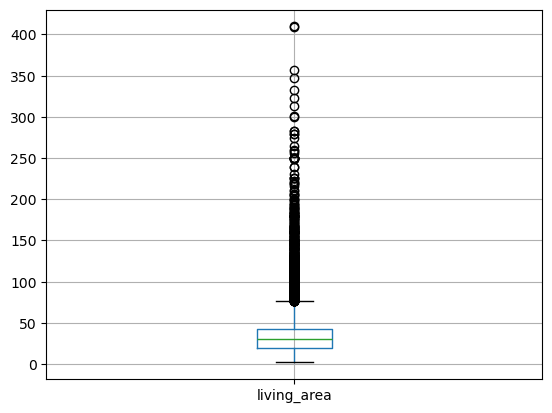

In [36]:
data.boxplot(column='living_area')
data['living_area'].describe()

Есть аномальные значения, поэтому сделаем небольшой срез.

count    23420.000000
mean        33.063090
std         16.682608
min          2.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        122.000000
Name: living_area, dtype: float64

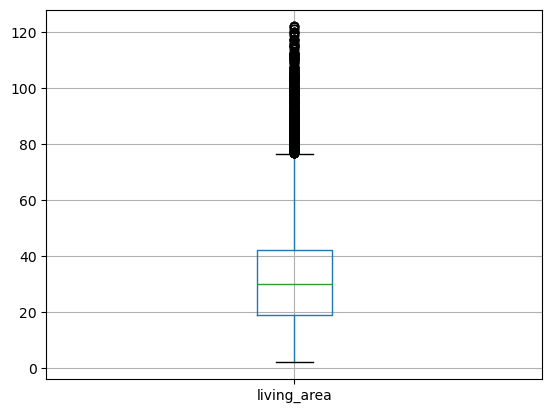

In [37]:
q99_living_area = data['living_area'].quantile(0.99)

good_data = good_data.query('living_area <= @q99_living_area')

good_data.boxplot(column='living_area')
good_data['living_area'].describe()

In [38]:
# good_data = data.query('living_area < 100' )
# good_data.boxplot(column='living_area')
# good_data['living_area'].describe()

Аномальные значения устранены.

Следующий столбец - площадь кухни.

count    23699.000000
mean        10.572683
std          6.095394
min          1.300000
25%          7.000000
50%          9.080000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

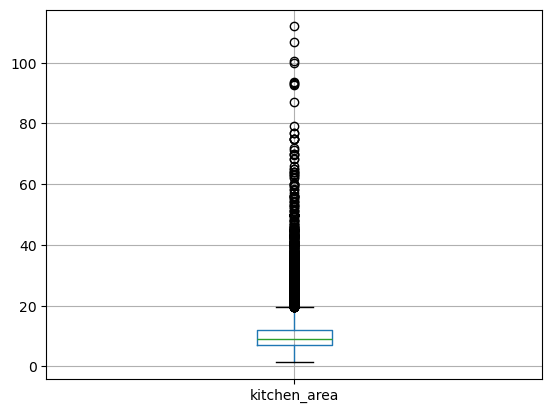

In [39]:
data.boxplot(column='kitchen_area')
data['kitchen_area'].describe()

Присутствуют выбросы. Осуществляем срез.

count    23271.000000
mean        10.101485
std          4.464762
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         36.000000
Name: kitchen_area, dtype: float64

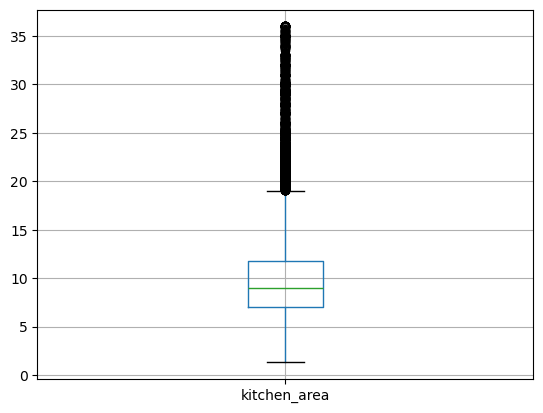

In [40]:
q99_kitchen_area = data['kitchen_area'].quantile(0.99)

good_data = good_data.query('kitchen_area <= @q99_kitchen_area')

good_data.boxplot(column='kitchen_area')
good_data['kitchen_area'].describe()

In [41]:
# good_data = data.query('kitchen_area < 40')
# good_data.boxplot(column='kitchen_area')
# good_data['kitchen_area'].describe()

Теперь параметр более менее приведен в порядок.

Проверим параметр цен.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

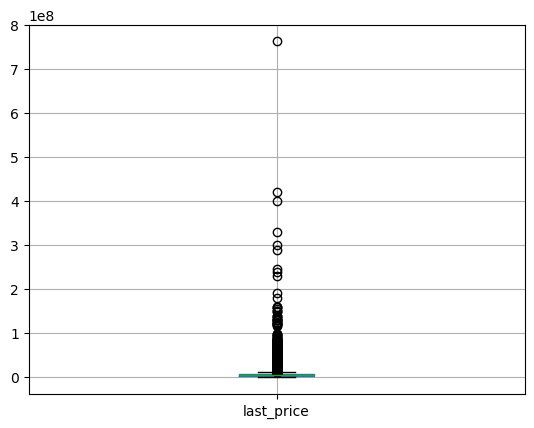

In [42]:
data.boxplot('last_price')
data['last_price'].describe()

Есть аномальные значения. Делаем срез.

count    2.317500e+04
mean     5.653207e+06
std      3.966385e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.595000e+06
75%      6.550000e+06
max      3.600000e+07
Name: last_price, dtype: float64

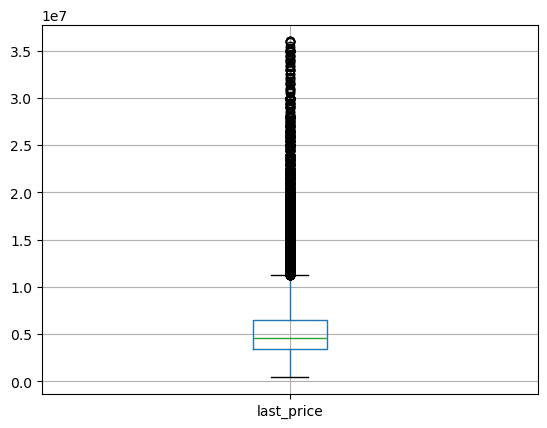

In [43]:
q99_last_price = data['last_price'].quantile(0.99)

good_data = good_data.query('last_price <= @q99_last_price')

good_data.boxplot(column='last_price')
good_data['last_price'].describe()

In [44]:
# good_data = good_data.query('last_price < 20000000')
# good_data.boxplot('last_price')
# good_data['last_price'].describe()

Параметр приведен к нормальным значениям.

Теперь разбираем параметр количества комнат.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

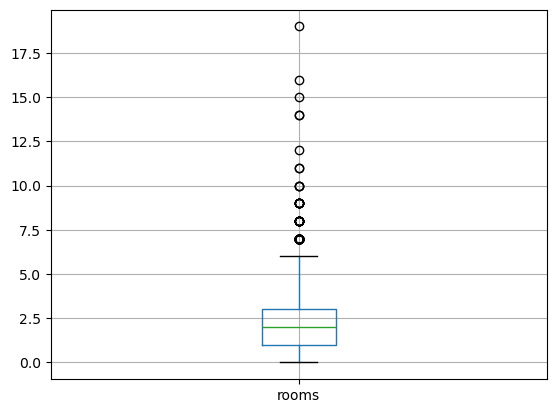

In [45]:
data.boxplot(column='rooms')
data['rooms'].describe()

Сделаем срез до 10 комнат.

count    23175.000000
mean         2.016181
std          0.975822
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

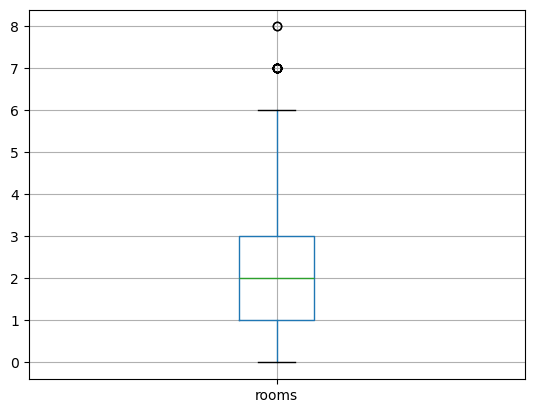

In [46]:
good_data = good_data.query('rooms <= 10')
good_data.boxplot(column='rooms')
good_data['rooms'].describe()

Далее анализируем длину потолка.

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

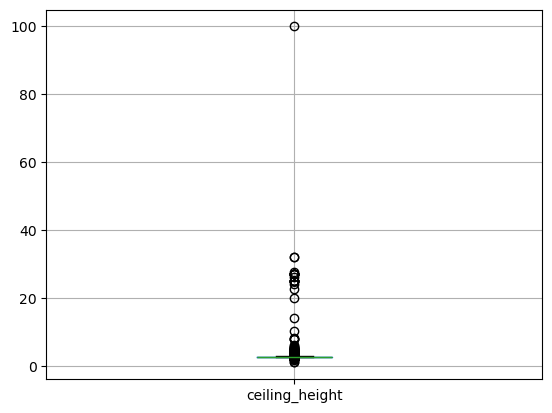

In [47]:
data.boxplot(column='ceiling_height');
data['ceiling_height'].describe()

In [48]:
data['ceiling_height'].quantile([0.01, 0.05, 0.95, 0.99])

0.01    2.50
0.05    2.50
0.95    3.13
0.99    3.60
Name: ceiling_height, dtype: float64

Есть несколько аномальных значений, как сверху,  так и снизу.

count    22924.000000
mean         2.681528
std          0.174902
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.600000
Name: ceiling_height, dtype: float64

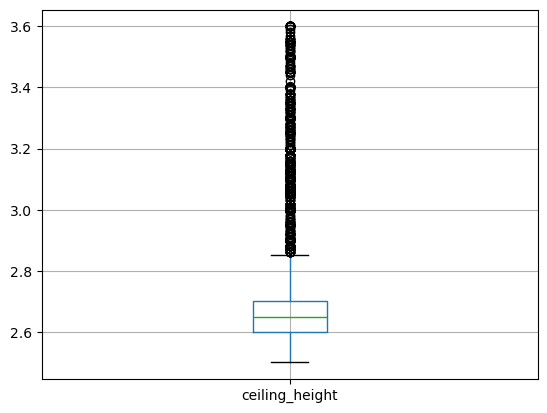

In [49]:
low = data['ceiling_height'].quantile(0.01)
high = data['ceiling_height'].quantile(0.99)

good_data = good_data.query('ceiling_height >= @low and ceiling_height <= @high')
good_data.boxplot(column='ceiling_height')
good_data['ceiling_height'].describe()

Разбираем этаж.

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

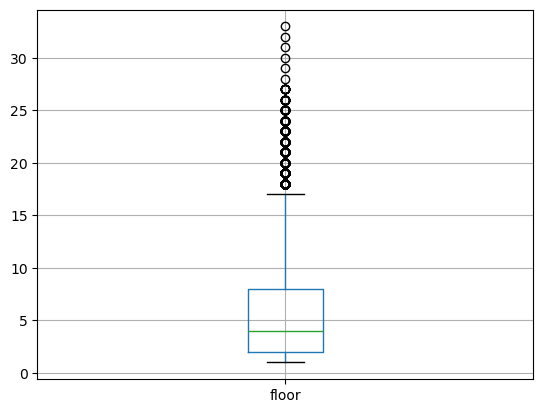

In [50]:
data.boxplot(column='floor')
data['floor'].describe()

Не будет делать срез.

In [51]:
# good_data = good_data.query('floor < 30')
# good_data.boxplot(column='floor')
# good_data['floor'].describe()

In [52]:
#good_data = good_data[good_data['floor'] < 30]

Проанализируем максимальный этаж в доме.

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

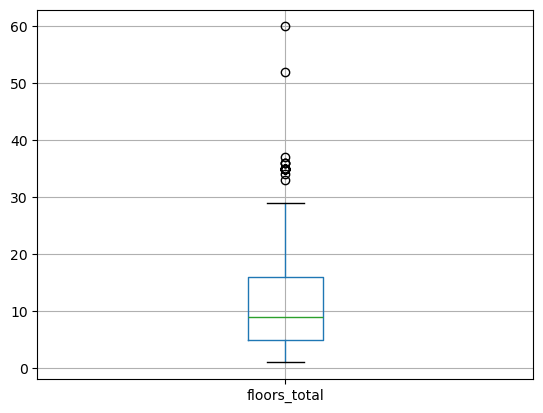

In [53]:
data.boxplot(column='floors_total')
data['floors_total'].describe()

Не будем делать срез.

Рассматриваем расстоние до центра города.

count    23699.000000
mean     13936.792797
std       7553.779633
min        181.000000
25%      10927.000000
50%      13098.500000
75%      15248.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

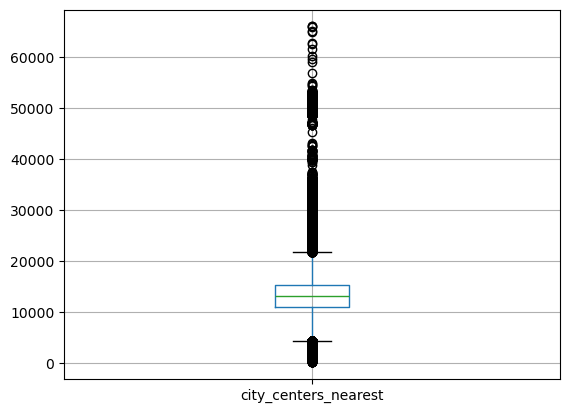

In [54]:
data.boxplot(column='city_centers_nearest')
data['city_centers_nearest'].describe()

Так же сделаем небольшой срез.

count    22692.000000
mean     13747.482637
std       6470.025605
min        181.000000
25%      11202.000000
50%      13098.500000
75%      15201.750000
max      48395.000000
Name: city_centers_nearest, dtype: float64

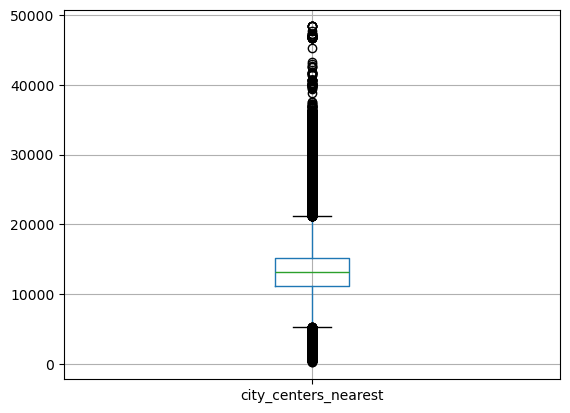

In [55]:
q99_city_centers_nearest = data['city_centers_nearest'].quantile(0.99)

good_data = good_data.query('city_centers_nearest <= @q99_city_centers_nearest')

good_data.boxplot(column='city_centers_nearest')
good_data['city_centers_nearest'].describe()

In [56]:
# good_data = good_data.query('2000 < city_centers_nearest < 30000')
# good_data.boxplot(column='city_centers_nearest')
# good_data['city_centers_nearest'].describe()

Далее разбираем расстояние до ближайшего аэропорта.

count    23699.000000
mean     28310.148023
std      11090.330161
min          0.000000
25%      21183.000000
50%      26726.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

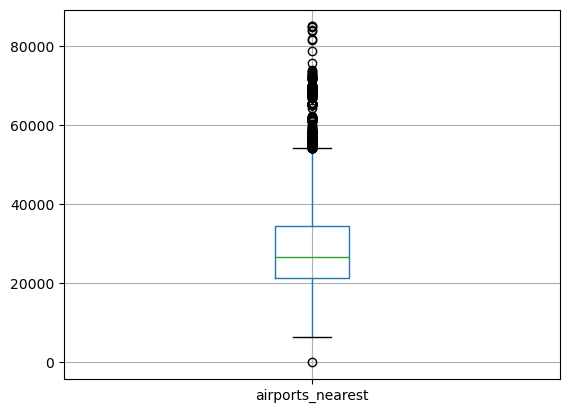

In [57]:
data.boxplot(column='airports_nearest')
data['airports_nearest'].describe()

Параметр уже в порядке.

Разбираем ближайшие парки.

count    23699.000000
mean       467.205789
std        200.579309
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64

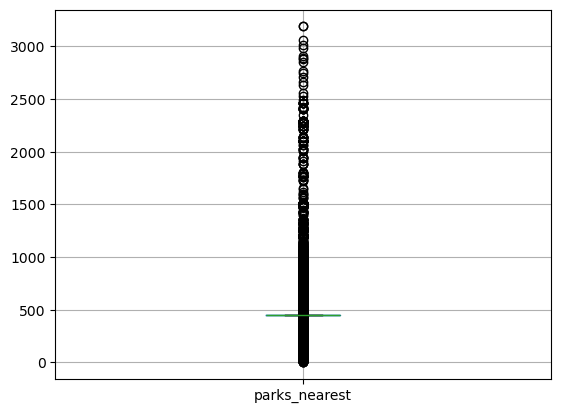

In [58]:
data.boxplot(column='parks_nearest')
data['parks_nearest'].describe()

Так же осуществляем срез.

count    22255.000000
mean       458.340238
std        123.891070
min         57.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       1270.000000
Name: parks_nearest, dtype: float64

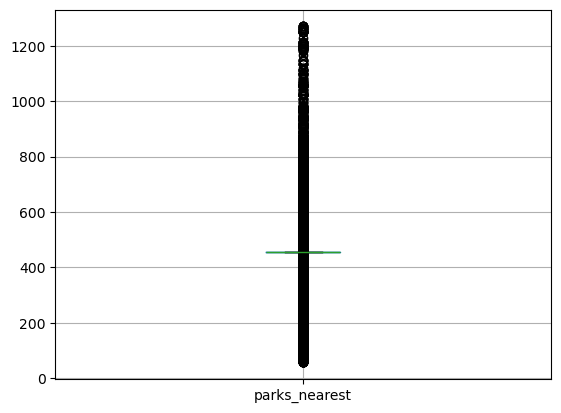

In [59]:
low = data['parks_nearest'].quantile(0.01)
high = data['parks_nearest'].quantile(0.99)

good_data = good_data.query('parks_nearest >= @low and parks_nearest <= @high')

good_data.boxplot(column='parks_nearest')
good_data['parks_nearest'].describe()

Разбираем ближайшие пруды.

count    23699.000000
mean       508.143128
std        172.357382
min         13.000000
25%        502.000000
50%        502.000000
75%        502.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

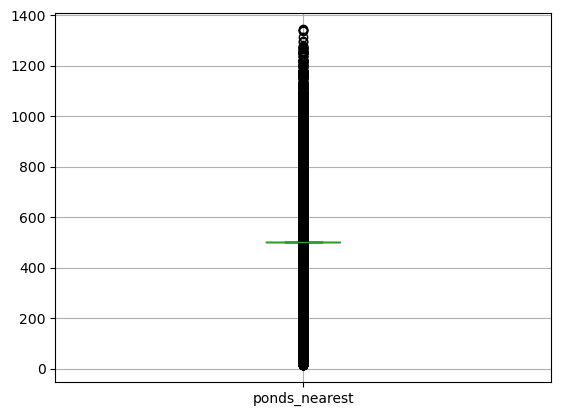

In [60]:
data.boxplot(column='ponds_nearest')
data['ponds_nearest'].describe()

Оставляем `ponds_nearest` как есть.

Рассмотрим количество прудов и парков.

count    23699.000000
mean         0.469049
std          0.748534
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around, dtype: float64

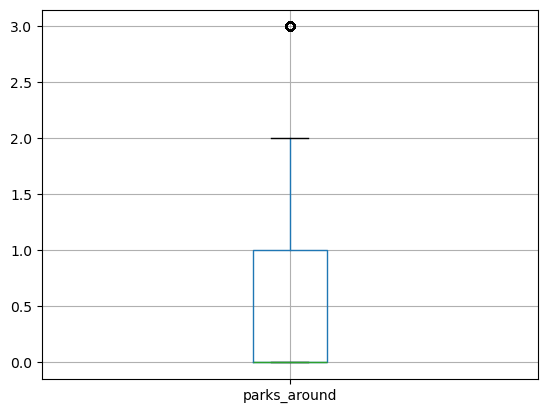

In [61]:
data.boxplot(column='parks_around')
data['parks_around'].describe()

count    23699.000000
mean         0.590911
std          0.883999
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around, dtype: float64

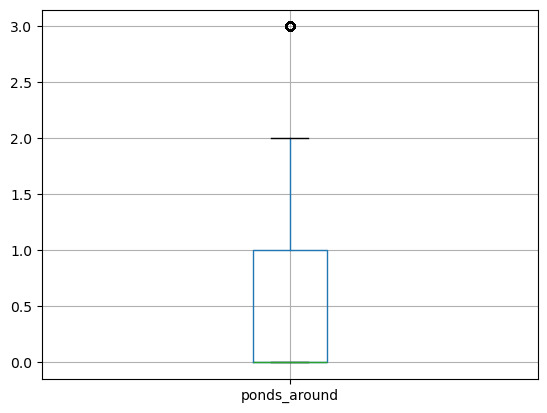

In [62]:
data.boxplot(column='ponds_around')
data['ponds_around'].describe()

Аномалий в данных столбцах не обнаружено.

Полноценный срез приведет к слишком большой потере даннных, поэтому делать его в полной мере не стоит.

In [64]:
lost_rows = len(data) - len(good_data)
lost_rows

1444

In [65]:
lost_percent = lost_rows / len(data) * 100
lost_percent


6.0930840963753745

In [66]:
print(f'Удалено строк: {lost_rows} ({lost_percent:.2f}%)')

Удалено строк: 1444 (6.09%)


Было потеряно 6% строк, что можно считать допустимым.

Можно сказать, что были проведены все необходимые процедуры предобработки данных - заполнение пропусков, устранение дубликатов, замена типа данных и устранение аномальных значений.

Можно переходить к следующему этапу - добавлению новых столбцов (Feature Engeenring)

## Feature Engeenring

Добавим в датафрейм новые столбцы, которые в дальнейшем будут использоваться при исследовательском анализе данных.

Добавим столбец характеризующий цену за 1 квадратный метр.

In [67]:
good_data['price_of_meter'] = (good_data['last_price'] / good_data['total_area']).round(0)
good_data['price_of_meter'].head(20)

0     120370.0
1      82921.0
2      92786.0
5      95066.0
6      99196.0
7     110545.0
8      87455.0
9      88525.0
10    127525.0
12     72037.0
13     82944.0
14    122222.0
15    119231.0
16     81707.0
17    116111.0
18    104839.0
19    117355.0
20     76500.0
21    101266.0
22     86207.0
Name: price_of_meter, dtype: float64

Добавим столбец дня недели, в который было выложено объявление.

In [68]:
good_data['day_of_the_week'] = good_data['first_day_exposition'].dt.weekday
#good_data['day_of_the_week'] = good_data['day_of_the_week'].astype('datetime64[M]')
good_data['day_of_the_week'].head(20)

0     3
1     1
2     3
5     0
6     3
7     3
8     2
9     6
10    3
12    3
13    5
14    3
15    5
16    3
17    4
18    4
19    2
20    3
21    2
22    0
Name: day_of_the_week, dtype: int32

Добавим столбец месяца, в котором было выложено объявление.

In [69]:
good_data['month_period'] = good_data['first_day_exposition'].dt.to_period('M')
good_data['month_period']

0        2019-03
1        2018-12
2        2015-08
5        2018-09
6        2017-11
          ...   
23693    2016-08
23695    2018-01
23696    2018-02
23697    2017-03
23698    2017-07
Name: month_period, Length: 22255, dtype: period[M]

Добавим столбец года, в который было выложено объявление.

In [70]:
good_data['year'] = good_data['first_day_exposition'].dt.year
good_data['year'].head(20)

0     2019
1     2018
2     2015
5     2018
6     2017
7     2019
8     2018
9     2017
10    2017
12    2016
13    2017
14    2016
15    2017
16    2017
17    2016
18    2017
19    2019
20    2017
21    2018
22    2017
Name: year, dtype: int32

Добавим столбец типа этажа - `первый`, `последний` или `другой`.

In [71]:
good_data['floor_type'] = 'Другой'
good_data.loc[good_data['floor'] == 1, 'floor_type'] = 'Первый'
good_data.loc[good_data['floor'] == good_data['floors_total'], 'floor_type'] = 'Последний'

Напоследок добавим столбец, измеряющий расстояние до центра города в километрах.

In [72]:
good_data['km_to_center'] = (good_data['city_centers_nearest'] / 1000).round(1)
good_data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_of_meter,day_of_the_week,month_period,year,floor_type,km_to_center
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.000000,8,False,...,482.0,2,755.0,<NA>,120370.0,3,2019-03,2019,Другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.600000,1,False,...,455.0,0,502.0,81,82921.0,1,2018-12,2018,Первый,18.6
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.300000,4,False,...,90.0,2,574.0,558,92786.0,3,2015-08,2015,Другой,13.9
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.400000,5,False,...,455.0,0,502.0,55,95066.0,0,2018-09,2018,Другой,13.1
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.600000,6,False,...,455.0,0,502.0,155,99196.0,3,2017-11,2017,Другой,19.1
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.437211,22,False,...,455.0,0,502.0,<NA>,110545.0,3,2019-04,2019,Другой,11.6
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.430000,26,False,...,455.0,0,502.0,189,87455.0,2,2018-05,2018,Другой,13.1
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.600000,7,False,...,455.0,0,502.0,289,88525.0,6,2017-02,2017,Другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.300000,3,False,...,310.0,2,553.0,137,127525.0,3,2017-11,2017,Другой,13.9
12,10,3890000.0,54.00,2016-06-30,2,2.65,5,30.000000,5,False,...,455.0,0,502.0,90,72037.0,3,2016-06,2016,Последний,13.1


Теперь можно переходить непосредственно к исследовательскому анализу данных.

## Исследовательский анализ данных

### Диаграммы для основных параметров

Будем разбирать параметры таблицы - строить диаграммы и делать выводы.

In [73]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib.ticker import FuncFormatter

def plot_distribution(
    data,
    column,
    bins=40,
    title="",
    xlabel="",
    ylabel="Количество объявлений",
    x_unit=None,          # None | "mln_rub"
    xlim_quantile=None    # например 0.99, если хочешь обрезать хвост визуально
):
    sns.set_theme(style="whitegrid")

    x = data[column].dropna()

    median = x.median()
    mean = x.mean()

    kde = gaussian_kde(x)
    x_grid = np.linspace(x.min(), x.max(), 1000)
    mode = x_grid[np.argmax(kde(x_grid))]

    plt.figure(figsize=(10, 5))

    sns.histplot(
        x,
        bins=bins,
        kde=True,
        color="#4C72B0"
    )

    # линии
    plt.axvline(median, color="red",    linestyle="--", linewidth=2, label=f"Медиана = {median:.0f}")
    plt.axvline(mode,   color="orange", linestyle="--", linewidth=2, label=f"Мода ≈ {mode:.0f}")
    plt.axvline(mean,   color="green",  linestyle="--", linewidth=2, label=f"Среднее = {mean:.0f}")

    # визуальный срез по квантилю (если нужен)
    if xlim_quantile is not None:
        plt.xlim(0, x.quantile(xlim_quantile))

    # форматирование оси X под цену
    if x_unit == "mln_rub":
        def mln_fmt(val, pos):
            return f"{val/1_000_000:.0f}"
        plt.gca().xaxis.set_major_formatter(FuncFormatter(mln_fmt))
        if not xlabel:
            xlabel = "Цена, млн руб."

        # и легенду тоже сделаем в млн руб. (чтобы не были огромные числа)
        plt.legend([
            f"Мода ≈ {mode/1_000_000:.1f} млн",
            f"Медиана = {median/1_000_000:.1f} млн",
            f"Среднее = {mean/1_000_000:.1f} млн"
        ])
    else:
        plt.legend()

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


Начнем с параметра общей площади.

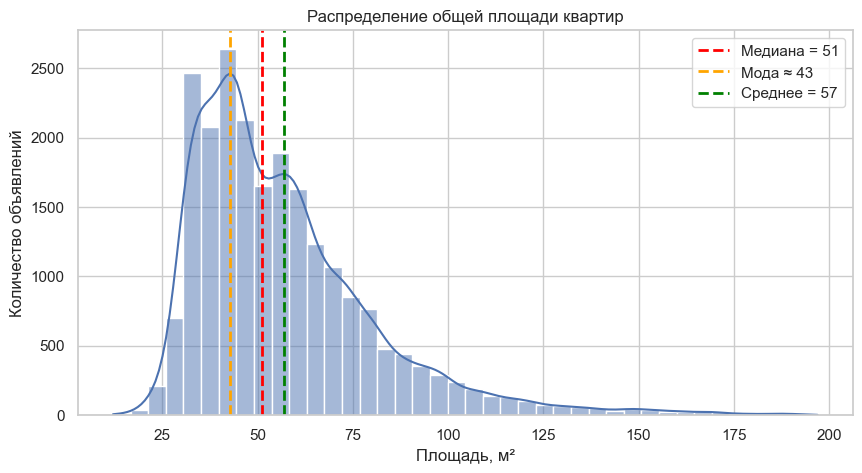

In [74]:
plot_distribution(
    data=good_data,
    column="total_area",
    bins=40,
    title="Распределение общей площади квартир",
    xlabel="Площадь, м²"
)


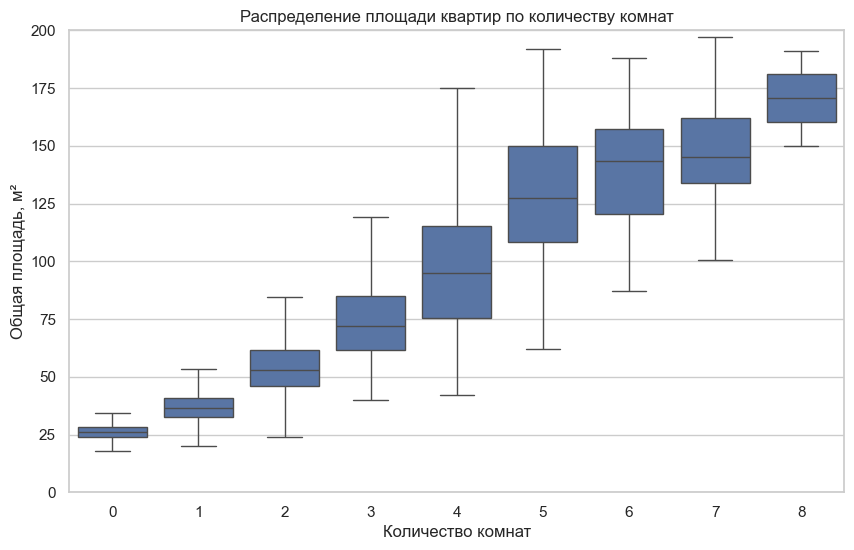

In [75]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=good_data,
    x='rooms',
    y='total_area',
    showfliers=False
)

plt.title('Распределение площади квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Общая площадь, м²')

plt.ylim(0, 200)
plt.show()


Основная масса объектов сосредоточена в диапазоне 30–70 м². Здесь можем наблюдать скошенное вправо распределение (правосторонне-асимметричное распределение), крупные квартиры встречаются реже и формируют длинный правый хвост распределения.


Наблюдается устойчивая зависимость между количеством комнат и общей площадью квартиры: с увеличением числа комнат медианная площадь закономерно растёт. При этом для малогабаритных квартир (студии и однокомнатные) характерен небольшой разброс значений, что указывает на стандартизированность сегмента. Для многокомнатных квартир разброс значительно увеличивается, что свидетельствует о разнообразии планировок и типов жилья.

Разберем жилую площадь.

In [76]:
good_data['living_area'].mean()

np.float64(32.607322701369384)

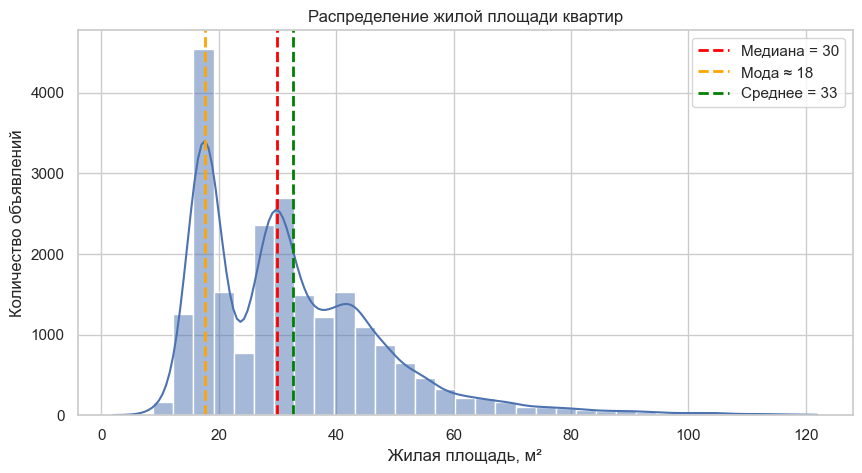

In [77]:
plot_distribution(
    data=good_data,
    column="living_area",
    bins=35,
    title="Распределение жилой площади квартир",
    xlabel="Жилая площадь, м²"
)



Распределение жилой площади квартир имеет выраженную правостороннюю асимметрию и два локальных максимума, которые, вероятно, связаны с количеством комнат (однокомнатные и двухкомнатные квартиры). Медианная жилая площадь составляет около 30 м², что характеризует типичную квартиру на рынке.

Строим гистограмму для кухонной площади.

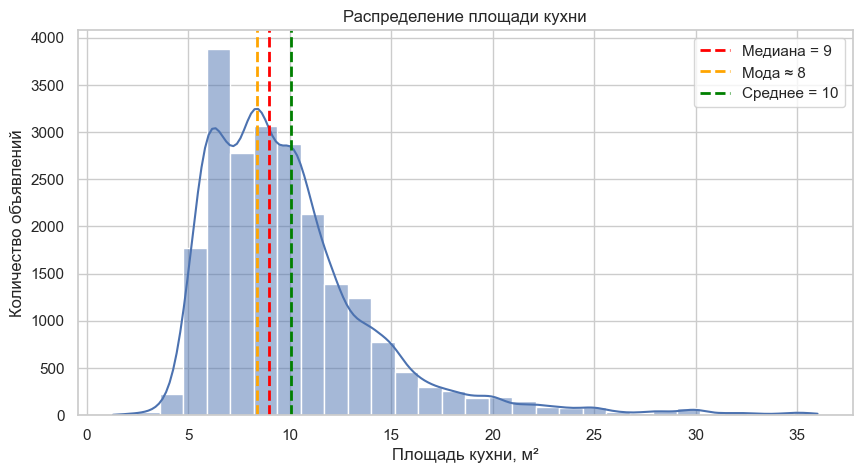

In [78]:
plot_distribution(
    data=good_data,
    column="kitchen_area",
    bins=30,
    title="Распределение площади кухни",
    xlabel="Площадь кухни, м²"
)



Распределение площади кухни имеет выраженную правостороннюю асимметрию. 
Наиболее часто встречающаяся площадь кухни составляет около 10-12 м². 

Строим гистограмму для цены.

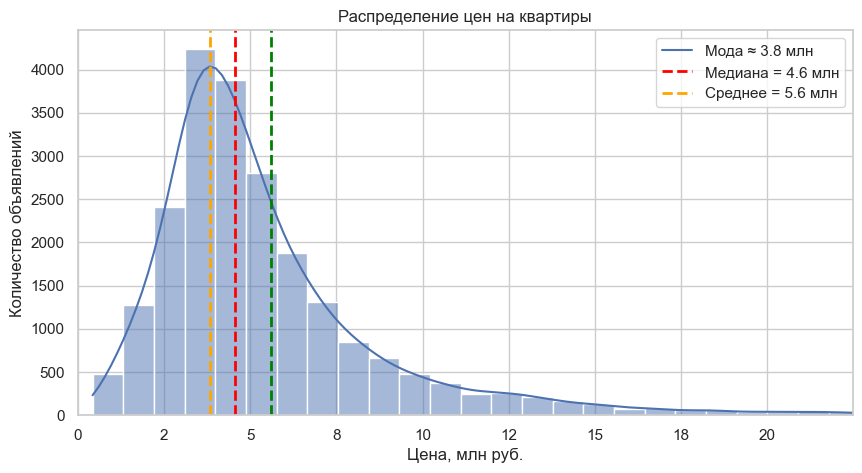

In [79]:
plot_distribution(
    data=good_data,
    column="last_price",
    bins=40,
    title="Распределение цен на квартиры",
    xlabel="Цена, млн руб.",
    x_unit="mln_rub",
    xlim_quantile=0.99   
)



Распределение цен на квартиры имеет выраженную правостороннюю асимметрию.
Наиболее часто встречающаяся цена составляет около 3–4 млн рублей, медианная — около 4.5 млн рублей.
Среднее значение выше медианы, что указывает на влияние дорогих объектов, формирующих длинный правый хвост распределения.

Теперь разбираем параметр количества комнат.

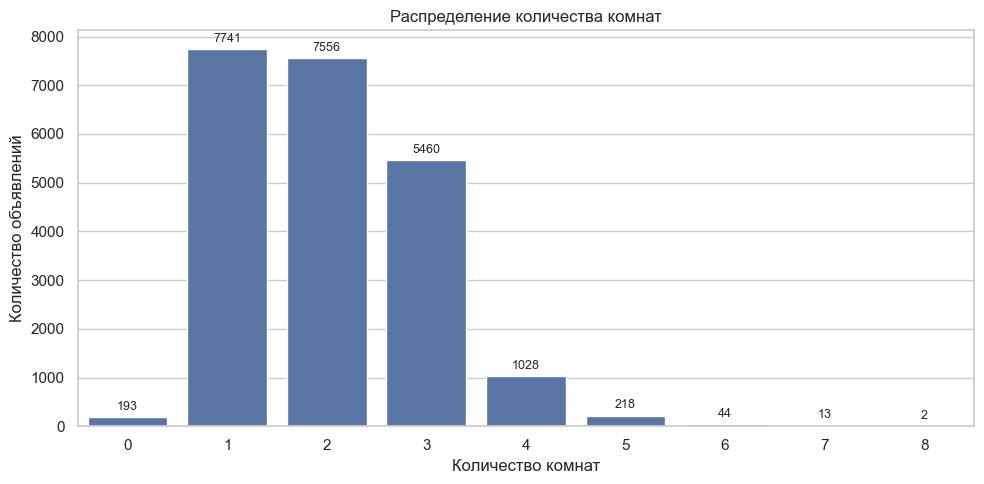

In [80]:
sns.set_theme(style="whitegrid")

x = good_data['rooms'].dropna()

plt.figure(figsize=(10, 5))

ax = sns.countplot(
    x=x,
    order=sorted(x.unique()),
    color="#4C72B0"
)

ax.bar_label(ax.containers[0], padding=3, fontsize=9)

plt.title("Распределение количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Количество объявлений")

plt.tight_layout()
plt.show()


Самые популярные предложения - однокомнатные и двухкомнатные квартиры. Однокомнатные популярней по ряду причин: цена (доступнее для одиноких людей, а также людям в гражданском браке), рентабельность(покупка с целью продать дороже, а так же сдача в наём для приезжих, студентов и т.д), наследство. 

Далее анализируем длину потолка.

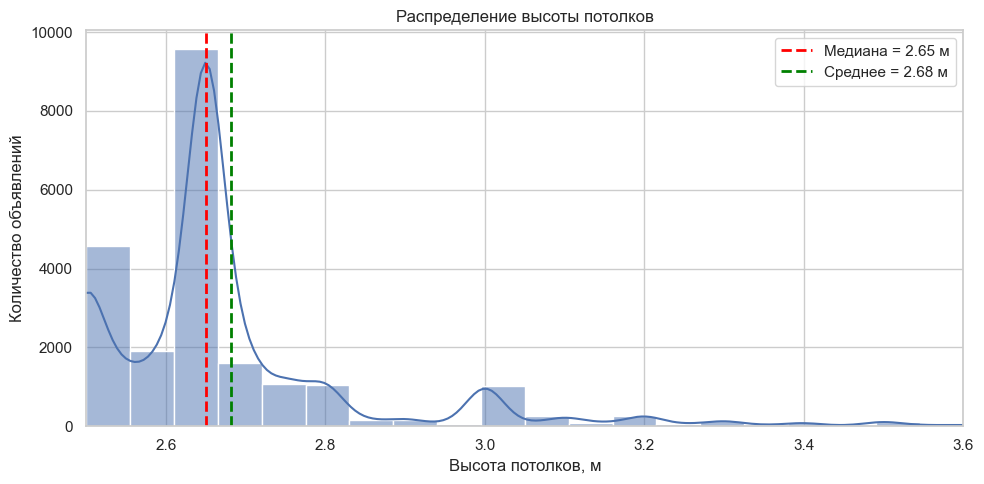

In [81]:
sns.set_theme(style="whitegrid")

x = good_data['ceiling_height'].dropna()

median = x.median()
mean = x.mean()

plt.figure(figsize=(10, 5))

sns.histplot(
    x,
    bins=20,
    kde=True,
    color="#4C72B0"
)

plt.axvline(
    median,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Медиана = {median:.2f} м"
)

plt.axvline(
    mean,
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Среднее = {mean:.2f} м"
)

plt.xlim(2.5, 3.6)

plt.title("Распределение высоты потолков")
plt.xlabel("Высота потолков, м")
plt.ylabel("Количество объявлений")
plt.legend()

plt.tight_layout()
plt.show()


Высота потолка в среднем составляет 2.7 метра. Распределение высоты потолков имеет несколько выраженных пиков, что отражает наличие типовых значений.

Разбираем этаж.

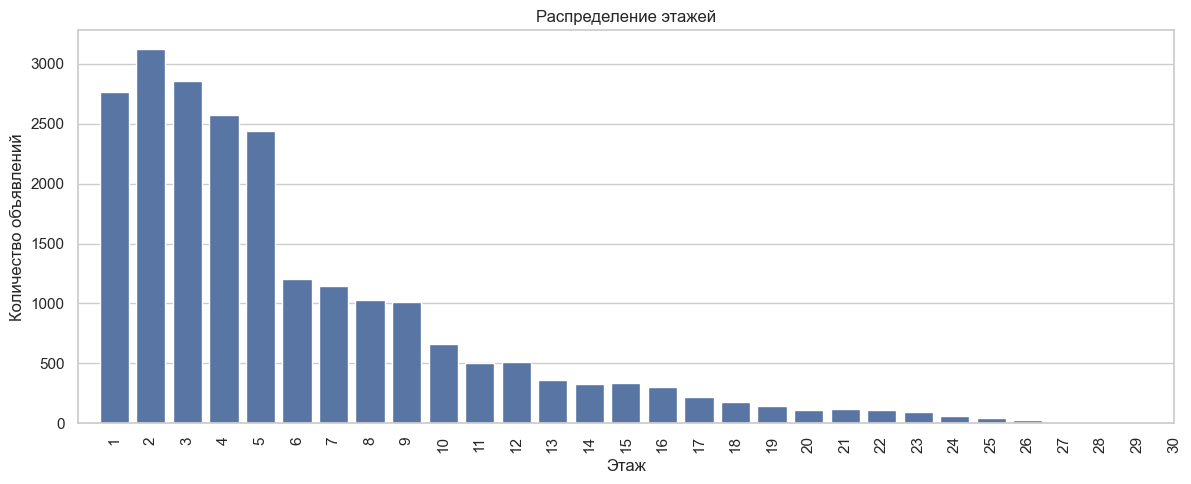

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 5))

sns.countplot(
    data=good_data,
    x='floor',
    color="#4C72B0"
)

plt.title("Распределение этажей")
plt.xlabel("Этаж")
plt.ylabel("Количество объявлений")

plt.xticks(rotation=90)
plt.tight_layout()
plt.xlim(-1, 29)
plt.show()


 Наибольшее количество объявлений приходится на квартиры, расположенные на нижних этажах (примерно 1–5 этажи). 
При этом значительная доля объектов расположена в домах до 9–10 этажей. Предусматриваются некоторые группы категорий зданий (1-5 и 6-10, например). В выборке присутствуют квартиры на высоких этажах, однако их доля существенно ниже по сравнению с низкими и средними этажами.


Взглянем на тип этажа.

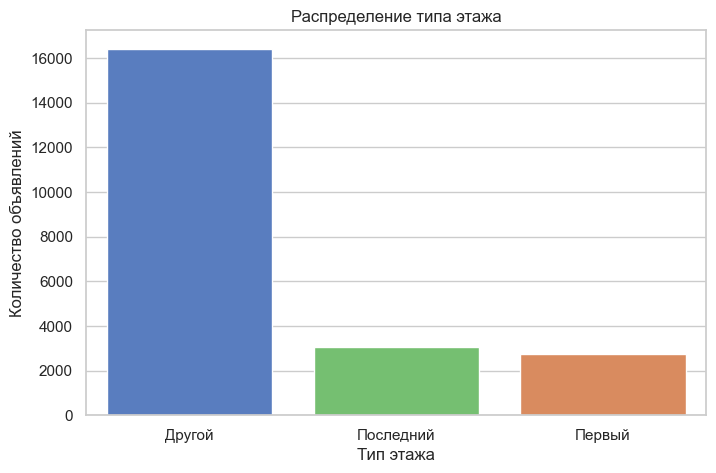

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.countplot(
    data=good_data,
    x='floor_type',
    hue='floor_type',
    order=good_data['floor_type'].value_counts().index,
    palette='muted',
    legend=False
)


plt.title('Распределение типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Количество объявлений')

plt.show()


Наиболее распространённый тип этажа — промежуточный («другой»), что ожидаемо, так как эта категория включает все этажи, кроме первого и последнего.

Квартиры на первом и последнем этажах встречаются значительно реже и представлены сопоставимыми долями. Это может быть связано с меньшим спросом на такие квартиры из-за возможных эксплуатационных неудобств (шум, холод, протечки крыши и т.д.).

Проанализируем максимальный этаж в доме.

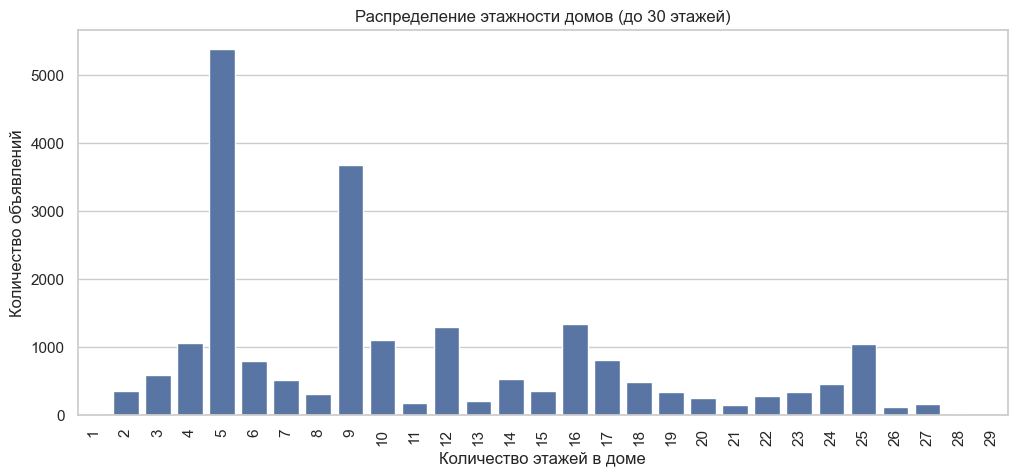

In [88]:
filtered = good_data[good_data['floors_total'] <= 30]

plt.figure(figsize=(12, 5))

sns.countplot(
    data=filtered,
    x='floors_total',
    order=filtered['floors_total'].value_counts().sort_index().index,
    color="#4C72B0"
)

plt.title("Распределение этажности домов (до 30 этажей)")
plt.xlabel("Количество этажей в доме")
plt.ylabel("Количество объявлений")
plt.xticks(rotation=90)

plt.show()



Распределение этажности домов является неоднородным и содержит несколько выраженных пиков. Наиболее часто встречаются дома высотой около 5, 9–10, 16 и 25 этажей, что соответствует типовым сериям застройки. Это указывает на наличие нескольких категорий зданий и отражает особенности массового жилищного строительства.


Рассматриваем расстоние до центра города.

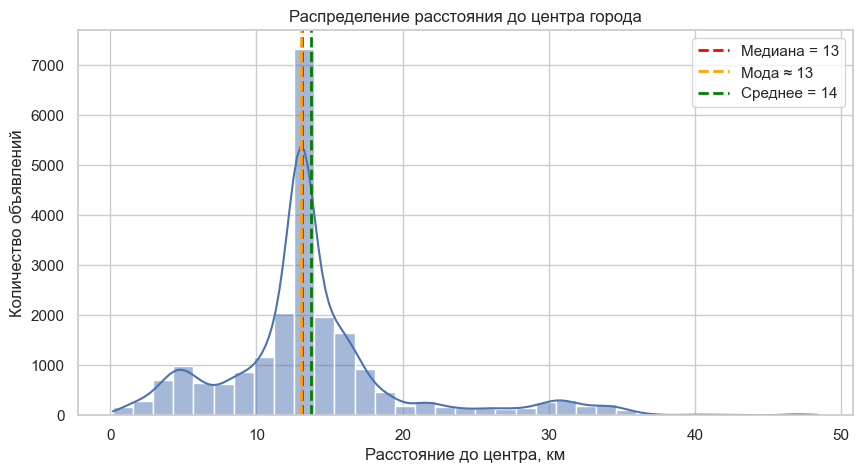

In [89]:
good_data['km_to_center'] = good_data['city_centers_nearest'] / 1000

plot_distribution(
    data=good_data,
    column='km_to_center',
    bins=35,
    title='Распределение расстояния до центра города',
    xlabel='Расстояние до центра, км'
)


Распределение расстояния до центра города имеет выраженную правостороннюю асимметрию с длинным правым хвостом, что указывает на наличие удалённых районов. Медиана и мода совпадают и составляют около 13 км, что говорит о типичном расстоянии большинства объектов от центра. Среднее значение немного выше (≈14 км), что объясняется влиянием квартир, расположенных на значительном удалении от центра.

Далее разбираем расстояние до ближайшего аэропорта.

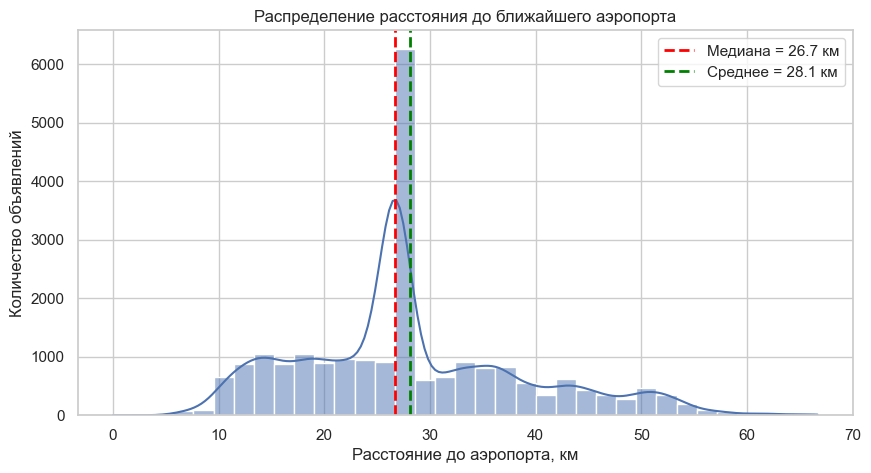

In [90]:
sns.set_theme(style="whitegrid")

x = good_data['airports_nearest'] / 1000  # км

plt.figure(figsize=(10, 5))

sns.histplot(
    x,
    bins=35,
    kde=True,
    color="#4C72B0"
)

plt.axvline(x.median(), color="red", linestyle="--", linewidth=2,
            label=f"Медиана = {x.median():.1f} км")

plt.axvline(x.mean(), color="green", linestyle="--", linewidth=2,
            label=f"Среднее = {x.mean():.1f} км")

plt.title("Распределение расстояния до ближайшего аэропорта")
plt.xlabel("Расстояние до аэропорта, км")
plt.ylabel("Количество объявлений")
plt.legend()

plt.show()


Распределение расстояния до ближайшего аэропорта является неоднородным и имеет выраженную правостороннюю асимметрию. Большая часть объектов расположена в диапазоне до 20 км, при этом наличие удалённых объектов смещает среднее значение вправо. Это отражает географические особенности размещения жилых районов относительно аэропорта.

Разбираем ближайшие парки.

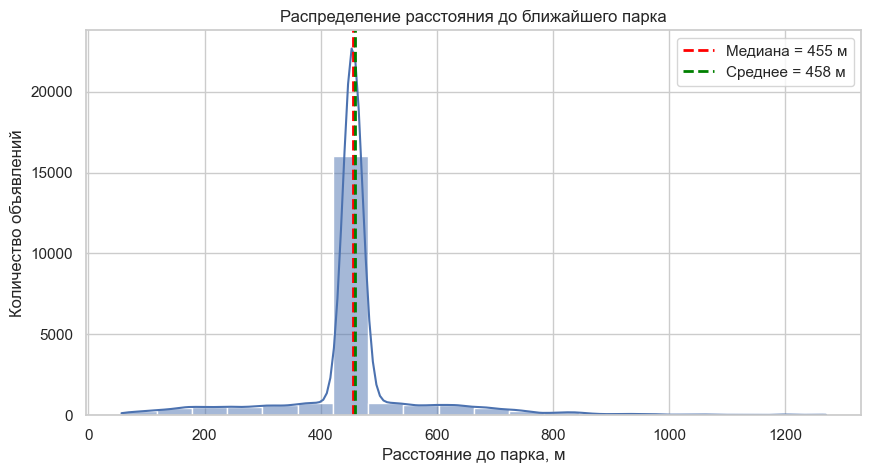

In [91]:
sns.set_theme(style="whitegrid")

x = good_data['parks_nearest']

plt.figure(figsize=(10, 5))

sns.histplot(
    x,
    bins=20,
    kde=True,
    color="#4C72B0"
)

plt.axvline(
    x.median(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Медиана = {x.median():.0f} м"
)

plt.axvline(
    x.mean(),
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Среднее = {x.mean():.0f} м"
)

plt.title("Распределение расстояния до ближайшего парка")
plt.xlabel("Расстояние до парка, м")
plt.ylabel("Количество объявлений")
plt.legend()

plt.show()




Распределение расстояния до ближайшего парка имеет выраженный пик в районе 400–500 метров, что указывает на наличие типового значения расстояния. Это может быть связано с особенностями городской застройки и округлением данных. Большинство квартир расположены в пределах пешей доступности до парка, при этом наблюдается правосторонний хвост — встречаются объекты, находящиеся значительно дальше от зелёных зон.

Добавим также гистограммы для дня недели и месяца.

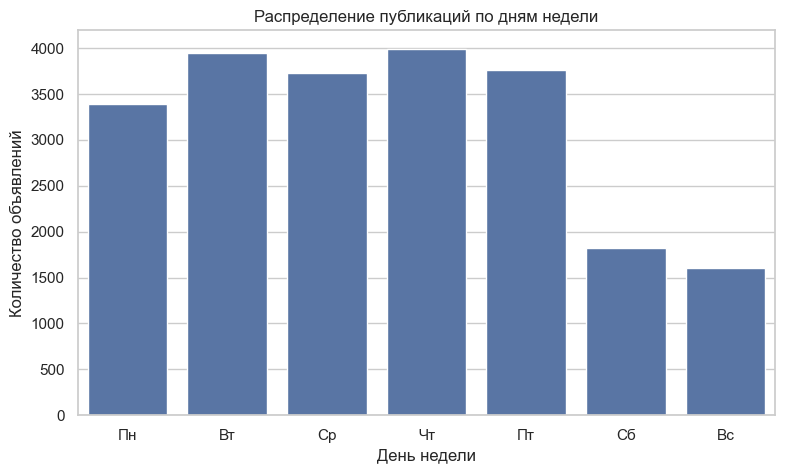

In [92]:
sns.set_theme(style="whitegrid")

order = [0, 1, 2, 3, 4, 5, 6]
labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']

plt.figure(figsize=(9, 5))

sns.countplot(
    x='day_of_the_week',
    data=good_data,
    order=order,
    color="#4C72B0"
)

plt.xticks(order, labels)
plt.title("Распределение публикаций по дням недели")
plt.xlabel("День недели")
plt.ylabel("Количество объявлений")

plt.show()


Публикация объявлений происходит в основном по будним дням.

### Изучаем средний срок продажи квартиры

Изучим, как быстро продавались квартиры. Пронанализируем столбец `days_exposition`.

count       19334.0
mean     176.930847
std      215.040681
min             2.0
25%            44.0
50%            93.0
75%           225.0
max          1580.0
Name: days_exposition, dtype: Float64

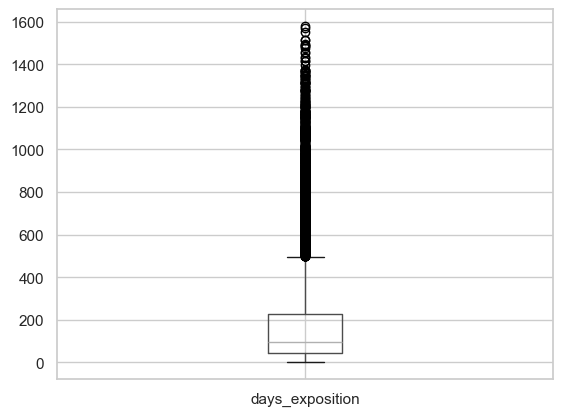

In [97]:
good_data.boxplot('days_exposition')
good_data['days_exposition'].describe()

Не будем делать срез, так как природа данных вполне допускает наличие объявлений, не закрытых в течение длительного промежуткого времени.

Построим гистограмму.

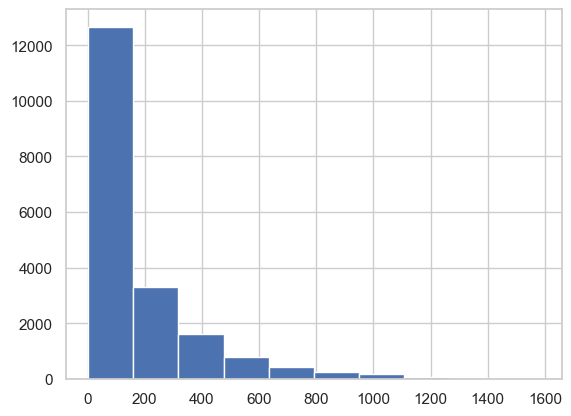

In [99]:
good_data['days_exposition'].hist(bins=10);

Подавляющее большинство квартир продавалось в течение первых 100 дней.

Посчитаем среднее и медиану.

In [100]:
print(good_data['days_exposition'].mean())
good_data['days_exposition'].median()

176.9308472121651


np.float64(93.0)

Еще раз вызовем `describe` для выведения конкретных выводов.

In [101]:
good_data['days_exposition'].describe()

count       19334.0
mean     176.930847
std      215.040681
min             2.0
25%            44.0
50%            93.0
75%           225.0
max          1580.0
Name: days_exposition, dtype: Float64

Продажи менее чем за 40 дней можно называть быстрыми, а больше чем за 200 дней - долгими.

### Узнаём, какие факторы больше всего влияют на цену.

Теперь посмотрим, какие факторы больше всего влияют на стоимость объекта. Сделаем сводные таблицы по необходимым параметрам.

In [103]:
total_area_pivot = good_data.pivot_table(index='total_area', values='last_price', aggfunc=['median'])
living_area_pivot = good_data.pivot_table(index='living_area', values='last_price', aggfunc=['median'])
kitchen_area_pivot = good_data.pivot_table(index='kitchen_area', values='last_price', aggfunc=['median'])
rooms_pivot = good_data.pivot_table(index='rooms', values='last_price', aggfunc=['median'])
floor_pivot = good_data.pivot_table(index='floor_type', values='last_price', aggfunc=['median'])
week_day_pivot = good_data.pivot_table(index='day_of_the_week', values='last_price', aggfunc=['median'])
month_pivot = good_data.pivot_table(index='month_period', values='last_price', aggfunc=['median'])
year_pivot = good_data.pivot_table(index='year', values='last_price', aggfunc=['median'])


Поочередно выведем графики и показатели корреляции для каждой сводной таблицы.

0.77


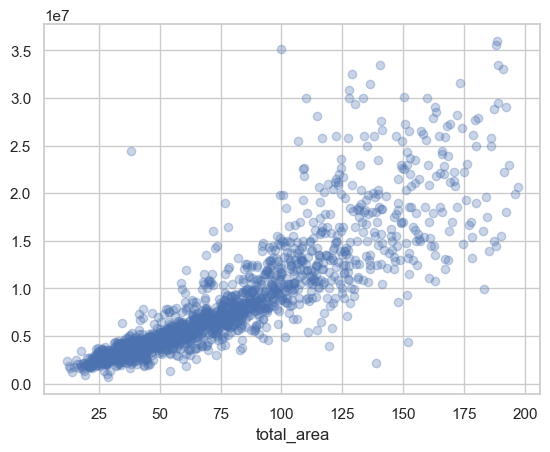

In [125]:
print(round(good_data['total_area'].corr(good_data['last_price']), 2))
total_area_pivot.plot(style='o', legend=False, alpha=0.3);

В соответствии с графиком выше существует довольно большая корреляция между ценой и общей площадью.

0.6717254709950817


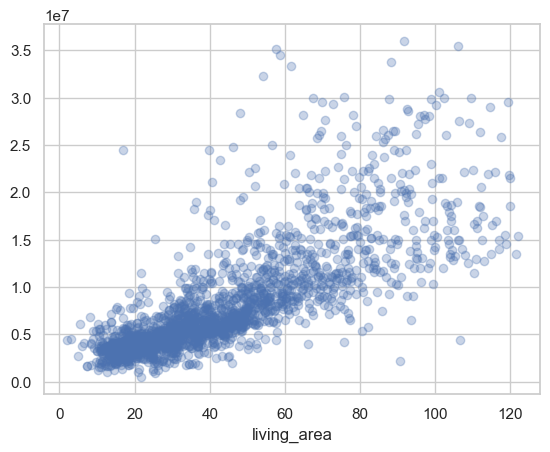

In [127]:
print(good_data['living_area'].corr(good_data['last_price']))
living_area_pivot.plot(style='o', legend=False, alpha=0.3);

Меньшая корреляция наблюдается на графике жилой площади.

0.5899030794449914


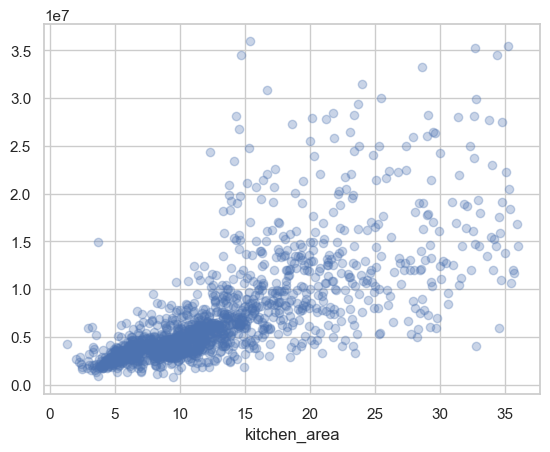

In [128]:
print(good_data['kitchen_area'].corr(good_data['last_price']))
kitchen_area_pivot.plot(style='o', legend=False, alpha=0.3);

Еще меньше корреляция с кухонной площадью.

Теперь проанализируем количество комнат.

0.48


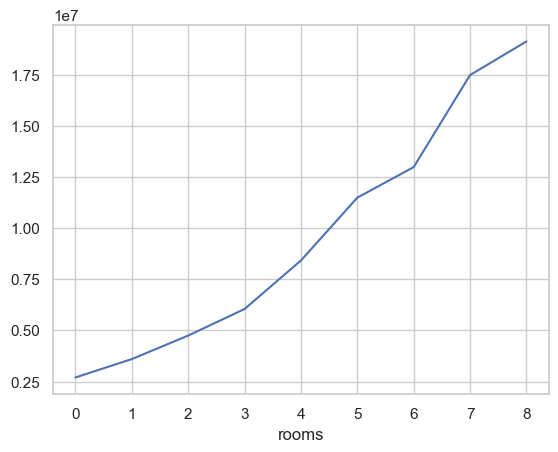

In [131]:
rooms_pivot.plot(legend=False)
print(round(good_data['rooms'].corr(good_data['last_price']), 2))

Все логично - чем больше количество комнат, тем выше цена. Тем не менее, показатель корреляции нельзя охарактеризовать как сильный.

Далее, вопрос этажей.

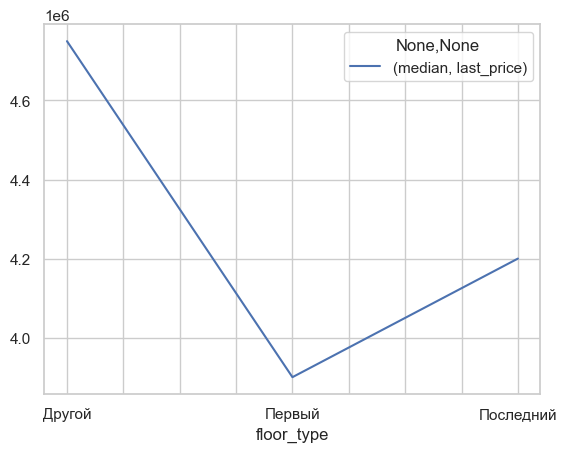

In [139]:
floor_pivot.plot();

Объекты на первом этаже имеют наименьшую цену. Объекты на последнем - пользуются уже большим спросом, но наибольшая цена, как правило, у промежуточных объектов недвижимости.

Теперь проанализируем зависимость цены от даты размещения объявления.

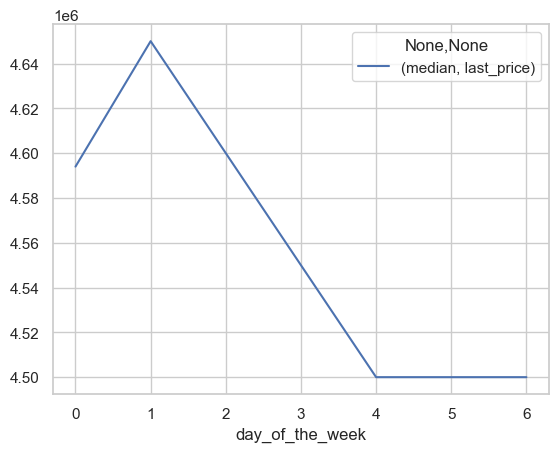

In [133]:
week_day_pivot.plot();

Большей ценой обладают объекты, выложенные на буднях, также можно наблюдать внезапное падение цены в пятницу перед выходными.

TypeError: float() argument must be a string or a real number, not 'Period'

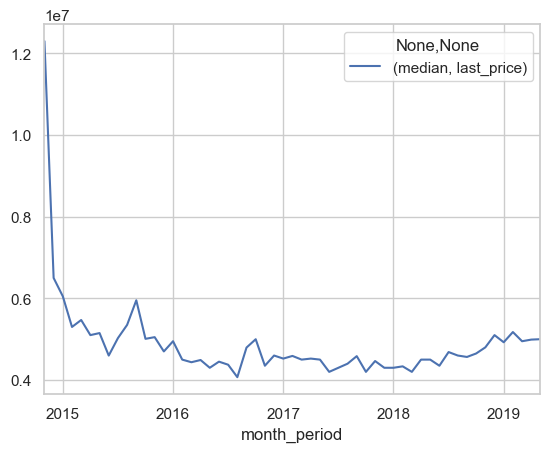

In [136]:
# month_pivot.plot()
# good_data['month_period'].corr(good_data['last_price'])

-0.03


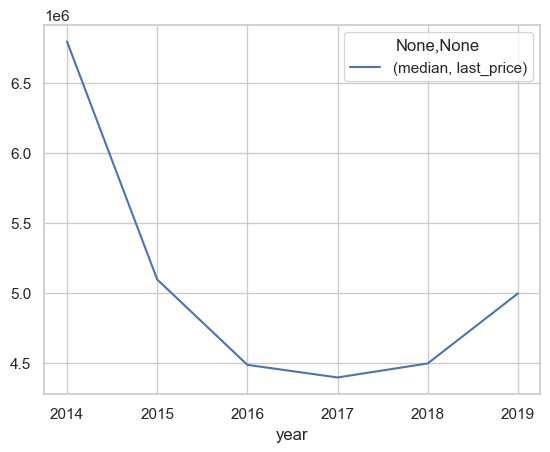

In [141]:
year_pivot.plot()
print(round(good_data['year'].corr(good_data['last_price']), 2))

Цены на недвижимость значительно понизились с 2014 по 2017 г., потом пошел медленный рост. Корреляции нет.

Основные 4 фактора, влияющих на цену - это общая площадь, жилая площадь, площадь кухни и количество комнат. В таком же порядке эти 4 фактора понижаются в своей значимости.


### Считаем среднюю цену одного квадратного метра для населенных пунктов

Составим анализ по населенным пунктам.

In [142]:
big_locations = good_data.pivot_table(index='locality_name', values='price_of_meter', aggfunc=['count', 'mean'])
big_locations.columns = ['count', 'mean']
big_locations.sort_values(by='count', ascending=False).head(10)

,count,mean
locality_name,,
санкт-петербург,14665,110391.802387
посёлок мурино,553,85655.169982
посёлок шушары,438,78681.025114
всеволожск,395,68617.060759
пушкин,340,102621.147059
посёлок парголово,324,90393.487654
колпино,318,75313.886792
гатчина,305,68811.337705
деревня кудрово,298,92542.291946


Подавляющее большинство объявлений находится в Санкт-Петербурге, на втором и третьем местах посёлки Шушары и Парголово. Из всех 10 населенных пунктов с наибольшим количеством предложений в Петербурге самая высокая цена за квадратный метр.

Найдем населенный пункт с наибольшей ценой за квадратный метр.

In [143]:
big_locations.sort_values(by='mean', ascending=False).head(1)

,count,mean
locality_name,,
санкт-петербург,14665,110391.802387


И также обозначим населенный пункт с наименьшей ценой за квадратный метр.

In [144]:
big_locations.sort_values(by='mean', ascending=True).head(1)

,count,mean
locality_name,,
деревня старополье,3,11206.333333


Видим, что наибольшая цена за квадратнйы метр в посёлке Лисий Нос, а наименьшая - в посёлке Усть-Ижора.

### Изучаем цену расстояния  до центра в Санкт-Петербурге

Рассмотрим зависимость цены квартиры в Санкт-Петербурге от расстояния до центра города. Создадим новый параметр - цену за километр.

In [145]:
good_data['price_for_km'] = good_data['last_price'] / good_data['km_to_center']

Рассмотрим этот параметр только для Санкт-Петербурга. Сделаем отдельный срез петербургских данных.

In [146]:
data_spb = good_data.loc[good_data['locality_name'] == 'санкт-петербург']
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,price_of_meter,day_of_the_week,month_period,year,floor_type,km_to_center,price_for_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,2,755.0,<NA>,120370.0,3,2019-03,2019,Другой,16.028,811080.608934
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.300000,4,False,...,2,574.0,558,92786.0,3,2015-08,2015,Другой,13.933,372927.582000
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,40.437211,22,False,...,0,502.0,<NA>,110545.0,3,2019-04,2019,Другой,11.634,680333.505243
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.600000,7,False,...,0,502.0,289,88525.0,6,2017-02,2017,Другой,15.008,359808.102345
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.300000,3,False,...,2,553.0,137,127525.0,3,2017-11,2017,Другой,13.878,363885.286064


Узнаем зависимость цены за километр от расстония до центра в километрах. Построим соответствующий график.

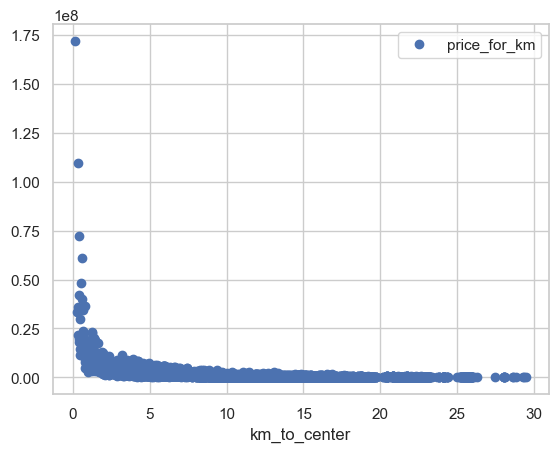

In [147]:
data_spb.plot(x='km_to_center', y='price_for_km', style='o');

В Санкт-Петербурге наблюдается выраженная нелинейная зависимость между расстоянием до центра города и показателем «цена за километр».

Квартиры, расположенные в пределах 2–3 км от центра, характеризуются аномально высокими значениями показателя, что связано с высокой стоимостью жилья при минимальной удалённости от центра.

По мере увеличения расстояния влияние центра быстро снижается, и начиная примерно с 5–7 км показатель стабилизируется, что указывает на выравнивание ценовых условий вне центральной зоны города.

## Общий вывод

В данном проекте были проанализированы данные, предварительно проведена их предобработка и добавлены необходимые для исследования новые признаки. 

1. Были изучены основные параметры и сделаны краткие выводы по ним;
   
2. Былы осуществлены процедуры предобработки данных - заполнены все необходимые пропуски, изменены типы данных в конкретных столбцах, устранены явные и неявные дубликаты, а также аномальные значения.

3. Добавлены в датафрейм новые признаки для проведения исследования - `price_of_meter`, `day_of_the_week`, `month`, `year`, `floor_type`.

4. Проведен подробный исследовательский анализ данных: проанализированы все основные параметры таблицы, изучен средний срок продажи объекьта, определены основные факторы, влияющие на стоимость объекта, посчитана средняя цена квадратного метра в наиболее популярных населенных пунктах и выделены отдельные населенные пункты с наименьшим и наибольшим показателем цены за квадратный метр.

Можно сказать, что основная цель данной работы - провести общее исследование данных сервиса недвижимости, может считаться выполненной.